In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
import os
from google.colab import drive
drive.mount('/content/drive')

# Load dataset
filepath = '/content/drive/My Drive/Colab Notebooks/Leadership & Consulting/Fitness Club Data V4.xlsx'
df = pd.read_excel(filepath)

# Basic data inspection
print(df.head())
print(df.info())
print(df.describe())

# Handle missing values if any
missing_values = df.isnull().sum()
print(missing_values)

# Label encoding categorical features (Gender, Default, Pmttype)
label_encoders = {}
for col in ['gender', 'default', 'pmttype']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


Mounted at /content/drive
   enrolldt      price    downpmt  monthdue      pmttype  use  age  gender  \
0  20190101  1830.2340   210.0000       6.0   CreditCard    1    0       0   
1  20190101  1296.6660  1296.6660       6.0         Cash    0    0       0   
2  20190101   930.4428   105.0000       5.0         Cash    0    0       0   
3  20190102   798.3696   199.5924       9.0  DirectDebit    0    0       1   
4  20190103  1206.2400   210.0000       9.0       Cheque    0    0       0   

   default  
0        0  
1        0  
2        0  
3        0  
4        0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24843 entries, 0 to 24842
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   enrolldt  24843 non-null  int64  
 1   price     24843 non-null  float64
 2   downpmt   24843 non-null  float64
 3   monthdue  24843 non-null  float64
 4   pmttype   24843 non-null  object 
 5   use       24843 non-null  int64  
 6   ag

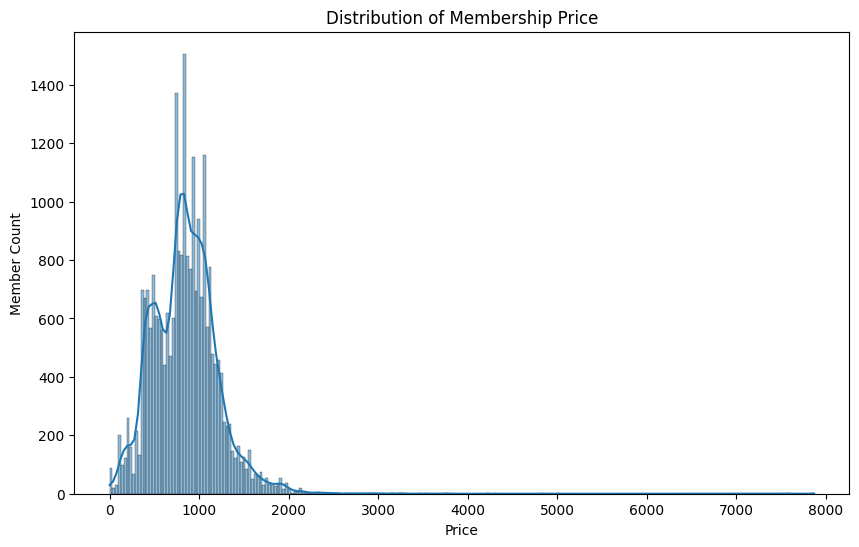

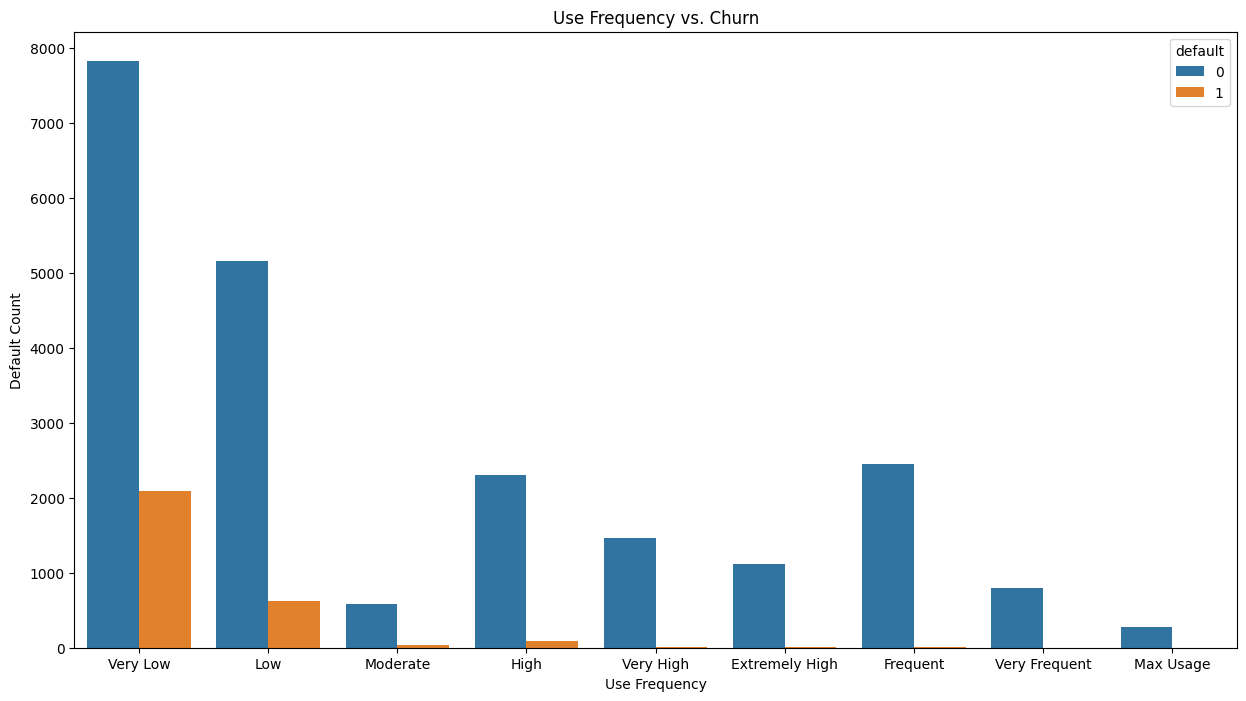

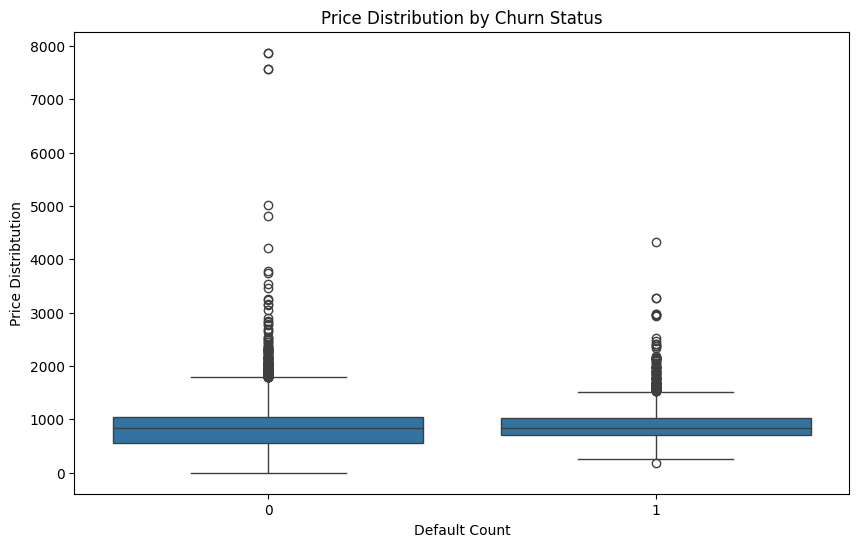

In [27]:
# Visualize distributions of numerical variables
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True)
plt.title('Distribution of Membership Price')
plt.xlabel('Price')
plt.ylabel('Member Count')
plt.show()


# Bar chart for 'Use' and its relation to 'Default'
plt.figure(figsize=(15, 8))
sns.countplot(x='use', hue='default', data=df)
plt.title('Use Frequency vs. Churn')
plt.xlabel('Use Frequency')
plt.ylabel('Default Count')
x_values = [0,1,2,3,4,5,6,7,8]
x_labels = ["Very Low", "Low", "Moderate", "High", "Very High", "Extremely High", "Frequent", "Very Frequent", "Max Usage"]
plt.xticks(ticks = x_values, labels = x_labels)
plt.show()

# Box plot for Price by Default
plt.figure(figsize=(10, 6))
sns.boxplot(x='default', y='price', data=df)
plt.title('Price Distribution by Churn Status')
plt.ylabel('Price Distribtution')
plt.xlabel('Default Count')
plt.show()



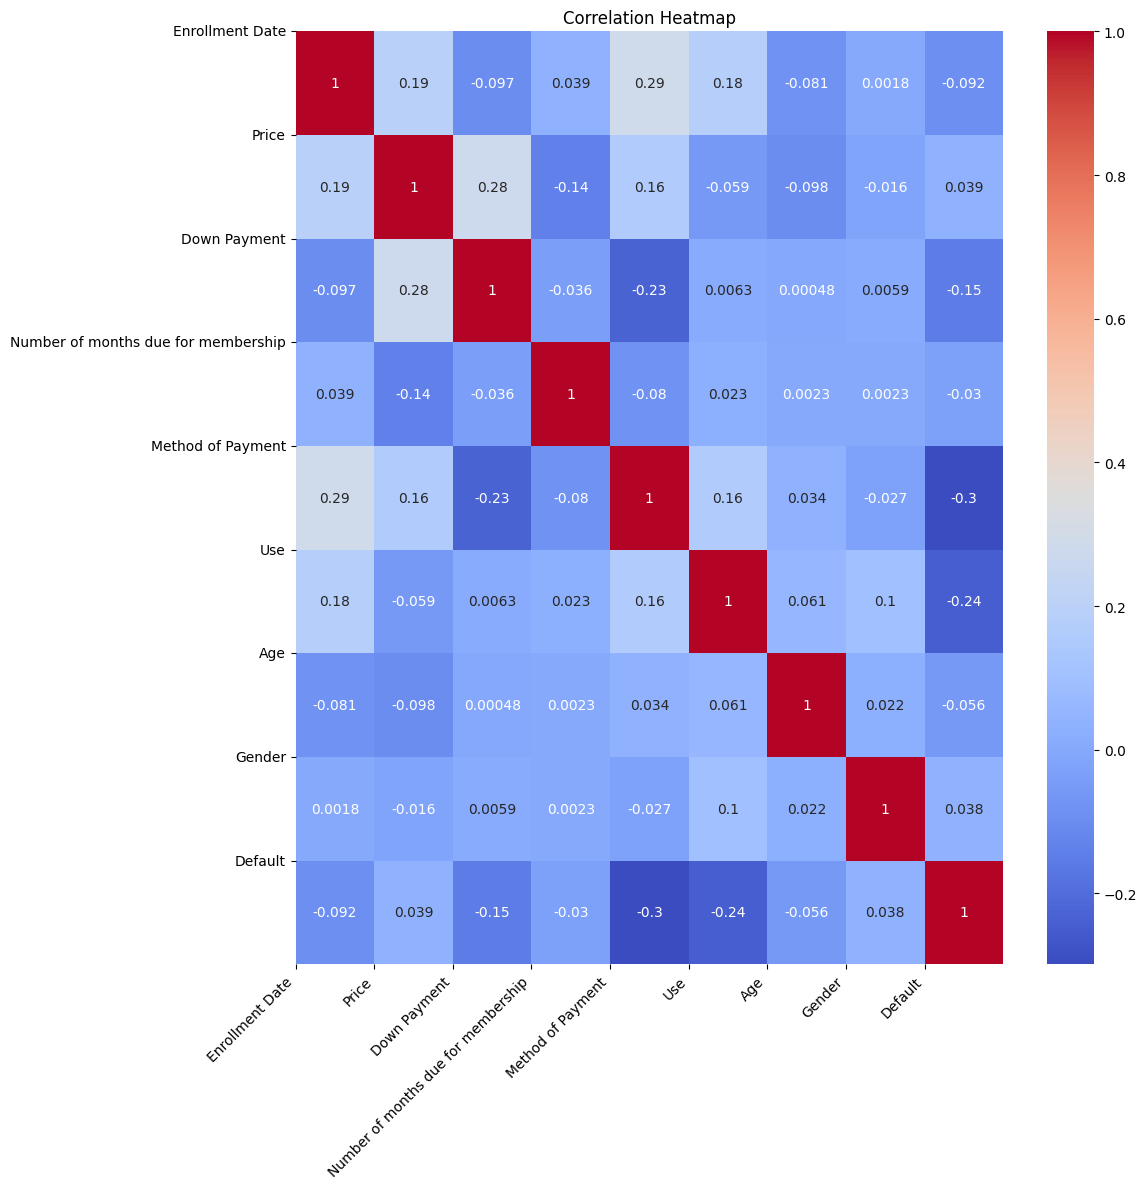

In [26]:
# Correlation Heatmap
plt.figure(figsize=(12, 12))  # Increase figure size for better spacing
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

# Set the tick labels using the same approach as before
x_values_1 = list(range(len(df.columns)))
x_labels_1 = ['Enrollment Date', 'Price', 'Down Payment', 'Number of months due for membership',
              "Method of Payment", "Use", "Age", "Gender", "Default"]
y_values_1 = list(range(len(df.columns)))
y_labels_1 = ['Enrollment Date', 'Price', 'Down Payment', 'Number of months due for membership',
              "Method of Payment", "Use", "Age", "Gender", "Default"]

# Rotate x-axis labels for better readability
plt.xticks(ticks=x_values_1, labels=x_labels_1, rotation=45, ha='right')

# Rotate y-axis labels to horizontal for better spacing
plt.yticks(ticks=y_values_1, labels=y_labels_1, rotation=0)

# Set title and show plot
plt.title('Correlation Heatmap')
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

In [15]:
# Feature selection
features = ['price', 'downpmt', 'monthdue', 'use', 'age', 'gender', 'pmttype']
target = 'default'

# Split the data into training and test sets
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train a Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

# Train a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Predictions
y_pred_log_reg = log_reg.predict(X_test_scaled)
y_pred_rf = rf.predict(X_test_scaled)

# Evaluation
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))


Logistic Regression Accuracy: 0.9056755668858177
Random Forest Accuracy: 0.910908359050047

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      6572
           1       0.66      0.52      0.58       881

    accuracy                           0.91      7453
   macro avg       0.80      0.74      0.76      7453
weighted avg       0.90      0.91      0.91      7453



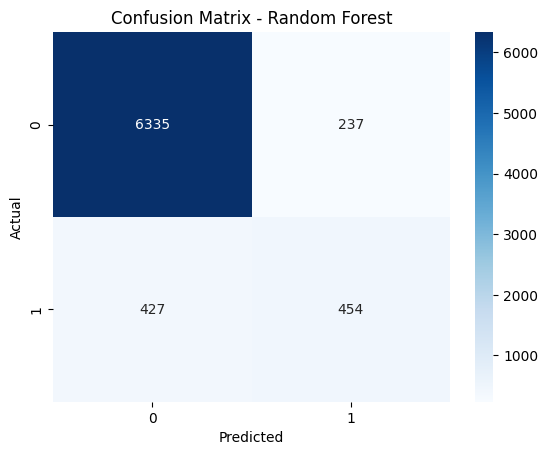

In [17]:
# Confusion Matrix for Random Forest
conf_matrix = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [28]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Train Random Forest with resampled data
rf_smote = RandomForestClassifier(n_estimators=100, random_state=42)
rf_smote.fit(X_train_smote, y_train_smote)

# Predictions and Evaluation
y_pred_rf_smote = rf_smote.predict(X_test_scaled)

print("Random Forest (SMOTE) Accuracy:", accuracy_score(y_test, y_pred_rf_smote))
print("\nClassification Report (Random Forest with SMOTE):")
print(classification_report(y_test, y_pred_rf_smote))


Random Forest (SMOTE) Accuracy: 0.904199651147189

Classification Report (Random Forest with SMOTE):
              precision    recall  f1-score   support

           0       0.96      0.93      0.95      6572
           1       0.58      0.68      0.62       881

    accuracy                           0.90      7453
   macro avg       0.77      0.81      0.79      7453
weighted avg       0.91      0.90      0.91      7453



In [29]:
# Train Random Forest with class weights to handle imbalance
rf_weighted = RandomForestClassifier(n_estimators=100, random_state=42, class_weight={0: 1, 1: 3})
rf_weighted.fit(X_train_scaled, y_train)

# Predictions and Evaluation
y_pred_rf_weighted = rf_weighted.predict(X_test_scaled)

print("Random Forest (Weighted) Accuracy:", accuracy_score(y_test, y_pred_rf_weighted))
print("\nClassification Report (Random Forest with Class Weights):")
print(classification_report(y_test, y_pred_rf_weighted))


Random Forest (Weighted) Accuracy: 0.9107741848919898

Classification Report (Random Forest with Class Weights):
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      6572
           1       0.66      0.51      0.57       881

    accuracy                           0.91      7453
   macro avg       0.80      0.74      0.76      7453
weighted avg       0.90      0.91      0.91      7453



In [30]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid Search with Random Forest
grid_search = GridSearchCV(estimator=rf_smote, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='f1')
grid_search.fit(X_train_smote, y_train_smote)

# Best parameters from GridSearchCV
print("Best Parameters:", grid_search.best_params_)

# Evaluate with best estimator
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test_scaled)

print("Optimized Random Forest Accuracy:", accuracy_score(y_test, y_pred_best_rf))
print("\nClassification Report (Optimized Random Forest):")
print(classification_report(y_test, y_pred_best_rf))


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Optimized Random Forest Accuracy: 0.9027237354085603

Classification Report (Optimized Random Forest):
              precision    recall  f1-score   support

           0       0.96      0.93      0.94      6572
           1       0.58      0.67      0.62       881

    accuracy                           0.90      7453
   macro avg       0.77      0.80      0.78      7453
weighted avg       0.91      0.90      0.91      7453



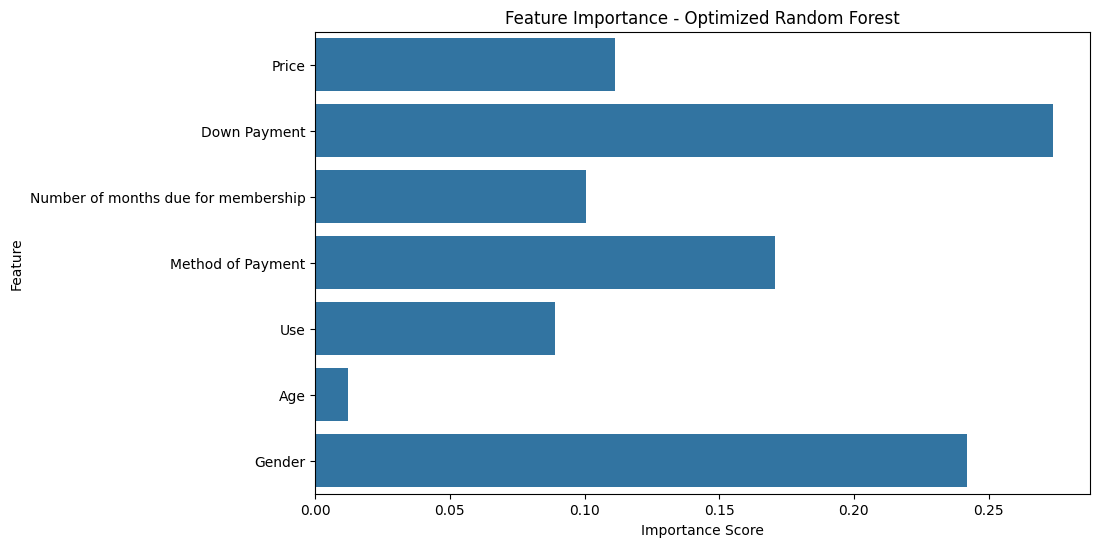

In [32]:
importances = best_rf.feature_importances_

# Manually specify the descriptive labels for each feature
feature_names = ['Price', 'Down Payment', 'Number of months due for membership',
                 "Method of Payment", "Use", "Age", "Gender"]

# Plot feature importance with updated labels
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importance - Optimized Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

